In [347]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [348]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [349]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [350]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [352]:
len(df.columns) # to check count of columns 

9

In [353]:
df['Genre'].nunique() 

2337

In [354]:
df.columns.unique()

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [355]:
df.duplicated().sum()

0

In [356]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [357]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

# Exploration Summary 
## 1. we have a data frame with 9827 rows and 9 columns 
## 2. Data looks a bit tidy with no nan and duplicate values 
## 3. release date column needs to be casted to date time format to extract the year values 
## 4. Overview , Orignal language and poster_Url wont be usefull during analysis hence need to be dropped 
## 5. there is a noticible outlier in popularity column as max value of popularity is quite far from the mean value 
## 6 . Genre column has coma seprated values and wide spaces  that needs to be handled and casted into category 


In [358]:

# What is the most frequent genre of movies released on Netflix?
# What genres has highest votes?
# What movie got the highest popularity? what's its genre?
# What movie got the lowest popularity? what's its genre?
# Which year has the most filmmed movies?


In [359]:
df.columns


Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [360]:
df['Release_Date']=  pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [361]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [362]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Droping the Columns 

In [363]:
cols=['Overview','Original_Language','Poster_Url']

In [364]:
df.drop(cols,axis=1 , inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

## categorising Vote_Average column 
now setting a criteria for Vote Average column 
Polular 
Average 
Below_Avg 
Not_Popular  
for this making an categorise col function 


In [365]:
def categorise_col (df, col, labels): # user defined Functions with 3 arguments
    edges = [ df[col].describe()['min'],
              df[col].describe()['25%'],
              df[col].describe()['50%'],
              df[col].describe()['75%'],
              df[col].describe()['max']
            ]
    df[col]=pd.cut(df[col],edges,labels=labels, duplicates='drop')
    return df


In [366]:
labels=['Not Popular','Below_avg','Average','Popular']
categorise_col(df,'Vote_Average', labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not Popular,Horror
9824,2016,The Offering,13.355,94,Not Popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [367]:
df['Vote_Average'].unique

<bound method Series.unique of 0           Popular
1           Popular
2         Below_avg
3           Popular
4           Average
           ...     
9822        Popular
9823    Not Popular
9824    Not Popular
9825        Average
9826        Popular
Name: Vote_Average, Length: 9827, dtype: category
Categories (4, object): ['Not Popular' < 'Below_avg' < 'Average' < 'Popular']>

In [368]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [369]:
 df.groupby('Vote_Average').agg(
     avg_cnt=('Title','count')
 ).reset_index()

,Vote_Average,avg_cnt
0,Not Popular,2467
1,Below_avg,2398
2,Average,2412
3,Popular,2450


In [370]:
df['Vote_Average'].value_counts()

Vote_Average
Not Popular    2467
Popular        2450
Average        2412
Below_avg      2398
Name: count, dtype: int64

In [371]:
df.isna().sum() # fount 100 nan values in Vote_Count 
df.dropna(inplace=True)

In [372]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [373]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


# now i will handle the Genre column with handiling the , (coma) and space and wants the output in next lines 
### splitinng the Genre in list 

In [374]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)

In [375]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [376]:
df.count()

Release_Date    25552
Title           25552
Popularity      25552
Vote_Count      25552
Vote_Average    25552
Genre           25552
dtype: int64

In [377]:
#count of Genre per Title 
df['Genre'].value_counts()

Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1426
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

In [378]:
# casting genre column into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [380]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery
...,...,...,...,...,...,...
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama


In [381]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [382]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [383]:
# What is the most frequent genre of movies released on Netflix?
# What genres has highest votes?
# What movie got the highest popularity? what's its genre?
# What movie got the lowest popularity? what's its genre?
# Which year has the most filmmed movies?



In [384]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [385]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

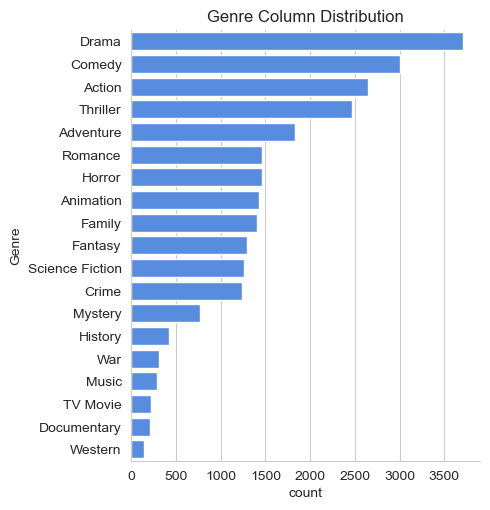

In [386]:
g=sns.catplot(y='Genre',data=df,kind='count' , 
           order=df['Genre'].value_counts().index,color='#4287f5')
plt.title('Genre Column Distribution')
plt.title('Genre Column Distribution')
plt.show()

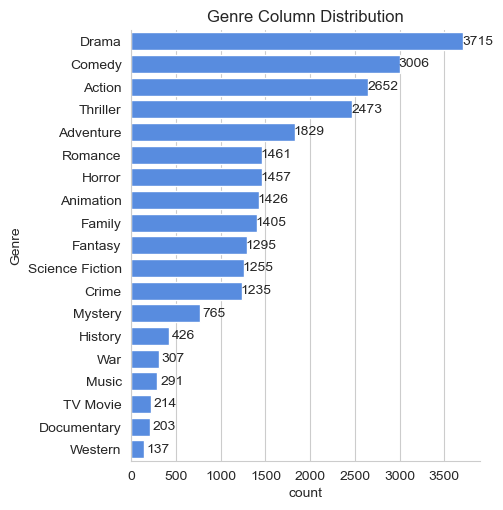

In [387]:
g = sns.catplot(y='Genre', data=df, kind='count', 
                order=df['Genre'].value_counts().index, color='#4287f5')

# Add title
plt.title('Genre Column Distribution')

# Annotate counts next to each bar
for p in g.ax.patches:
    width = p.get_width()
    g.ax.text(width + 160, p.get_y() + p.get_height() / 2, 
              f'{int(width)}', ha='center', va='center')

# Show the plot
plt.show()

# What genres has highest votes?

In [388]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


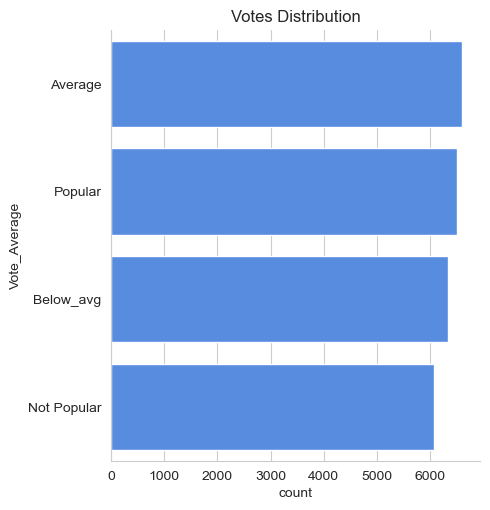

In [414]:
ax=sns.catplot(y='Vote_Average', data=df,kind='count'
           ,order=df['Vote_Average'].value_counts().index,
            color='#4287f5'
           )
plt.title('Votes Distribution')


plt.show()

# What movie got the highest popularity? what's its genre?

In [390]:
df.head().sort_values(by='Popularity',ascending=False)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [391]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# What movie got the lowest popularity? what's its genre?

In [392]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


In [393]:
df[df['Popularity']==df['Popularity'].min()].drop_duplicates(subset='Title')

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25549,1984,Threads,13.354,186,Popular,War


# Which year has the most filmmed movies?

In [394]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [395]:
#count of unique movies prr year 
gp=df.groupby('Release_Date').agg(
    unique_cnt=('Title','nunique')
).sort_values(by='unique_cnt',ascending=False).head()

In [396]:
gp

,unique_cnt
Release_Date,
2021,711
2018,527
2017,509
2019,498
2016,469


In [401]:
gp.reset_index(inplace=True)


Index(['Release_Date', 'unique_cnt'], dtype='object')

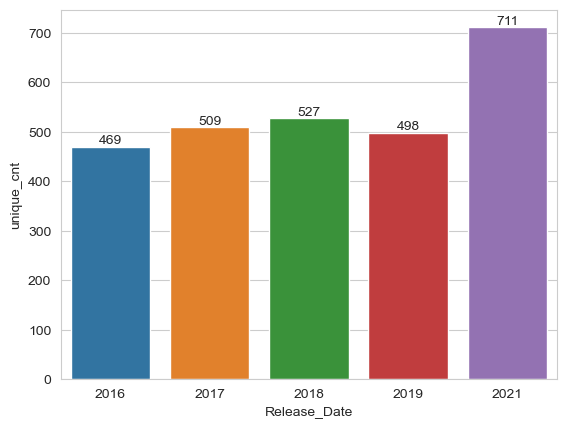

In [409]:
ax=sns.barplot(data=gp , x='Release_Date',y='unique_cnt')
for containers in ax.containers:
    ax.bar_label(containers,fmt='%d', padding=0)
plt.show()

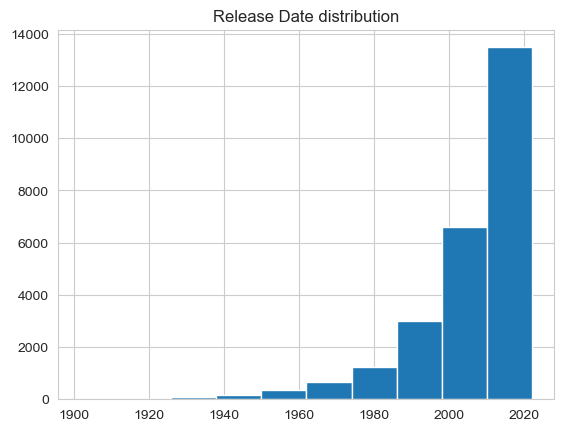

In [403]:
df['Release_Date'].hist()
plt.title('Release Date distribution')
plt.show()

# Conclusion
### QI: What is the most frequent genre in the dataset?
#### Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.
### Q2: What genres has highest votes?
#### we have 25.5% of our dataset with popular vote (652e rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities .
### Q3: What movie got the highest popularity? what's its genre?
#### Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.
### Q4: What movie got the lowest popularity? what's its genre?
#### The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama,'war',' sci-fi.
### Q4: Which year has the most filmmed movies?'
#### year 2021 has the highest filmming rate in our dataset.